In [15]:
# Import required libraries
import pandas as pd
import  numpy as np

# Load Titanic dataset
train_df = pd.read_csv(r'C:\Users\amare\workspace\Kaggle\Data\train.csv')
test_df = pd.read_csv(r'C:\Users\amare\workspace\Kaggle\Data\test.csv')
# Preview the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Example unit test for data loading

def test_train_data_shape():
    assert train_df.shape[1] == 12, "Train dataset should have 12 columns"
    assert len(train_df) > 0, "Train dataset should not be empty"

test_train_data_shape()

# Suppress XGBoost log notes and warnings
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['XGB_VERBOSE'] = '0'

In [17]:
# Build a predictive model for Titanic survival
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<AxesSubplot:title={'center':'Feature Importance'}>

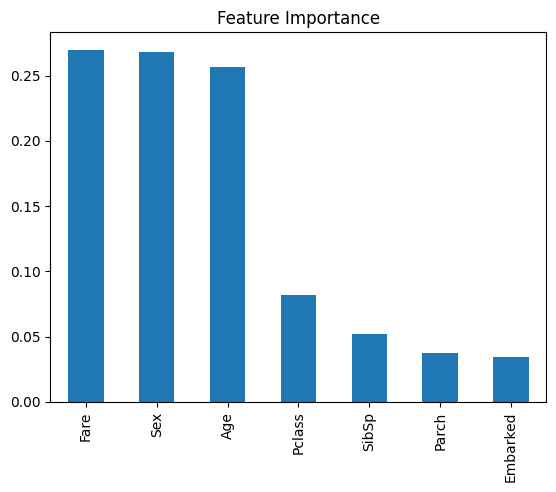

In [18]:


# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = train_df.copy()

# Encode categorical variables
# Fill missing values
for col in ['Age', 'Fare']:
    df[col].fillna(df[col].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df[features]
y = df['Survived']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')

In [ ]:
print(y_pred)
print(X_val.head())

In [ ]:
# Inference on test_df using trained XGBoost model
# Prepare test data (same preprocessing as train)
test_data = test_df.copy()
for col in ['Age', 'Fare']:
    test_data[col].fillna(df[col].median(), inplace=True)
test_data['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_test = test_data[features]

# Run inference
inference_preds = xgb_model.predict(X_test)

# Show first 10 predictions
print('First 10 predictions:', inference_preds[:10])

# Optionally, create a submission DataFrame
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': inference_preds})
submission.head()
submission.to_csv('submission.csv', index=False)

In [ ]:
inference_preds = rf_model.predict(X_test)
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': inference_preds})
submission.head()
submission.to_csv('submission.csv', index=False)